# Frequency analysis

Frequency analysis ・・・ 直訳すると、周波数解析。波という（使えない）データを、何Hzの波がどこからどこまで、どれくらいの強さ流れたのか、などといった、きちんと使える「データ」に変換すること。



## FFT、高速フーリエ変換、なる手法を使い、周波数解析をしよう！

FFTは、Fast Fourier Transform、高速フーリエ変換の略です。

フランスの物理学者、ジョゼフ・フーリエ男爵(1768~1830)が、フーリエ変換という理論を18世紀の終わり頃に展開した！！
その理論は、なんと音や光といった**自然界に存在する波動**を、

$ y = 10sin(2x) + 5sin(9x) + 80sin(7.9x) $

みたいな感じに、**数式**、つまり**データの塊**みたいなものに変換することができてしまう、という代物！！！、なんです。  

ここに出てくる $ sin $ というのは、三角関数というものです。  
三角関数をグラフにするとこんな形になります。 
これは $y = sin(x)$ のグラフです。

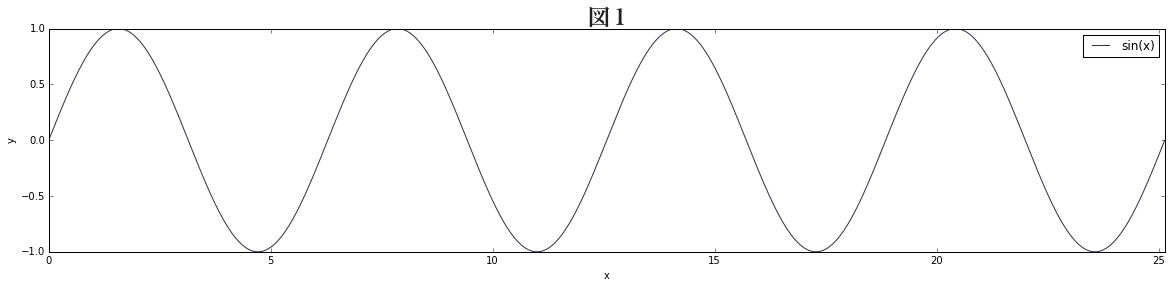

In [11]:
%matplotlib inline

import scipy
import numpy as np
import pylab
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'/Library/Fonts/ヒラギノ明朝 Pro W6.otf', size=22)

# 縦4、横20の大きさでグラフを描くスペースを作る
pylab.figure(figsize=(20,4))

# 0 ≦ x ≦ 10×2π(約62.83)の範囲の、10000個の点で構成された比例のグラフを作る。これがxの値になる。
x = np.linspace(0, 4*2*np.pi, 10000)

# yの値はxをsinした値で求める。
y = np.sin(x)

# 説明を添える
pylab.title('図１', fontproperties=fp, color="#202020")
pylab.xlabel('x')
pylab.ylabel('y')

# 0 ≦ x ≦ 10×2πになるようにスペースをぶった切る
pylab.xlim([0,4*2*np.pi])

#グラフを描く
pylab.plot(x, y, color="#30304c", label='sin(x)')
pylab.legend()
pylab.show()

数学には関数という概念があって、$ sin(99) $ みたいな感じで使います。  
これは、$99$という数字を、$sin$という計算方法によって、別の数字へと変換する、という意味です。  
まあ、とにかく中でなんか計算をしているな、ということだけわかればいいです。  
それで、この $y = sin(x)$ というグラフは、その$sin$で計算するときの、元の値を$x$として、  
その$x$を$0$から$25$あたりまで、少しずつ変えていって作り上げたグラフです。

なーんか、このグラフ、理科の授業で、音をオシロスコープで観察した実験の時の、映し出されたグラフの形に似ていませんか？  

そう、そうなんです。

自然界に存在する波動というのはこの $ sin $ という数式から出てくるグラフとほぼ同じで、  
例えば、**海の波**の動きや、**地震**で生じる波、低い音から高い音までの様々な**音波**、なんとバネによって吊り下げられた**重りの振動**も、はたまた**日々の平均気温**の上下まで、**ありとあらゆる自然現象**に**「$sin$」による波形**を当てはめることができてしまうのです！

そしてこのフーリエ変換は、先ほど話した通り、そういった波動を数式、つまりデータに変換することができます。**波というのはそのままでは何もわかることがなく、このフーリエ変換を通して初めて、波からわかることが出てくるのです。**

次は、本格的にフーリエ変換、そして高速フーリエ変換なるものが具体的にどんなものなのかを言いたいと思います。

## What is "Fourier Transform"?

フーリエ変換というのは、数学の世界でもよく使われていますが（完全な数式の中で動かす場合はフーリエ級数展開と呼ばれる）、  
工学・科学の世界でも大変重宝されています。とっても社会に役立っています。

まず、フーリエ変換と$sin$が生み出す波の、数学的な特性みたいなものを話します。 

冒頭で、$ y = 10sin(2x) + 5sin(9x) + 80sin(7.9x) $という関数を見せました。（図１のグラフではないです。）

実際にフーリエ変換したときには、上の式のように数個の項で構成されているわけではなく、大量の項で構成されています。  
数学の世界では項が「無限」に存在することになっています。カッコイイですね。  
そして、$sin$ が生み出す波にはとても興味深い特性があります。やばいです。  
先ほどの $ y = 10sin(2x) + 5sin(9x) + 80sin(7.9x) $ のような関数は、

$a \times sin(bx)$

といった項の組み合わせで表現できます。aとbにそれぞれ10だとか2だとか、数字を入れて、項が出来上がります。こう言った項が「無限」に組み合わさって、波を表現します。  
それで、例えば、ピアノで「ド」の音を鳴らすとします。しかし、それを録音したとしても、図１のような曲線にはなりません。  
図１の曲線は一番単純な波だからです。ピアノが出す音は、複雑で、異なる「**周波数**」の音が組み合わさって出来たものなのです。  
ここで「**周波数**」という言葉が出ました。周波数というのは音で言えば「音の高さ」のことで、単位はHzです、というのは習いましたね。  
重要なのは、上の式において $b$ の値が、その**周波数**である、というところです。$b$ の値を大きくすればするほど、高い音になります。  
そして、$a$の値は**振幅**、音の大きさです。$a$ の値を大きくすればするほど、大きい音になります。  
この$a$の値は、フーリエ変換においては影響度、といったほうがいいかもしれません。  
これを作ったフーリエさんは凄いなあ、と思うのが、この$a$の値の存在です。よくよく考えてみれば当たり前のことで、要約すれば、「$a$の値は波の大きさです」で済むのですが、それでもこの考えを**最初に**考えたというのは凄いと思います。  
で、その話をしたいと思います。

もちろんこの「フーリエ変換」というのは、波のデータを取得した後で、パソコンなどを使って解析するわけですが、  
例えばピアノの音を録音したにしても、やっぱりノイズ、雑音が入っちゃうわけです。  
でも、ピアノを鳴らしている時には、僕たちはピアノの音しか聞こえませんよね。  
それは単純に、「ピアノの音が大きい」というだけのことです。つまり、「ノイズよりも圧倒的にピアノの音の**影響力**が大きい」ということです。  
フーリエ変換の凄いところはその、現実世界でのピアノの音の影響力、というのを、$a$という値にして、数学的に表せるところなんです！

図１では単純な、一つの周波数（音の高さ）でのグラフになっています。  
今度のグラフでは、ふたつの周波数でグラフを作ってみましょう。

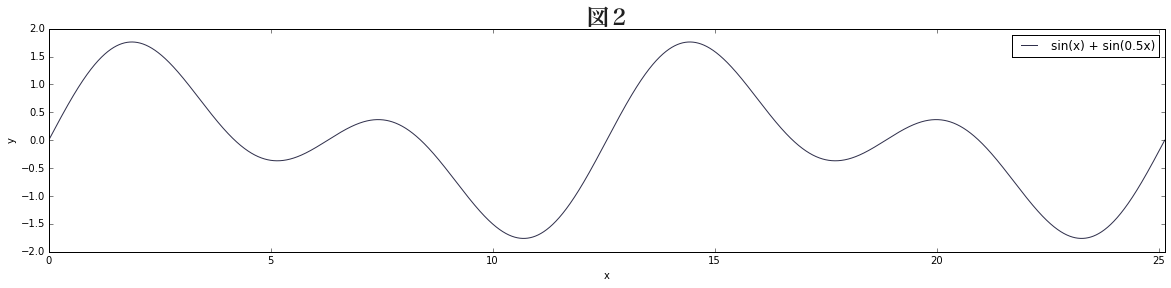

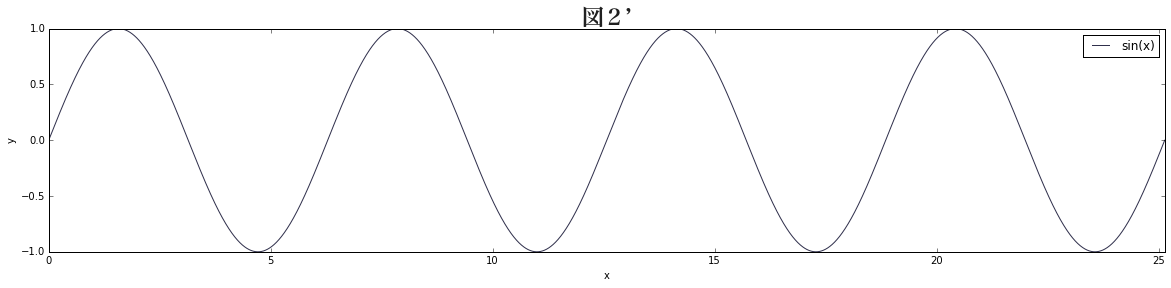

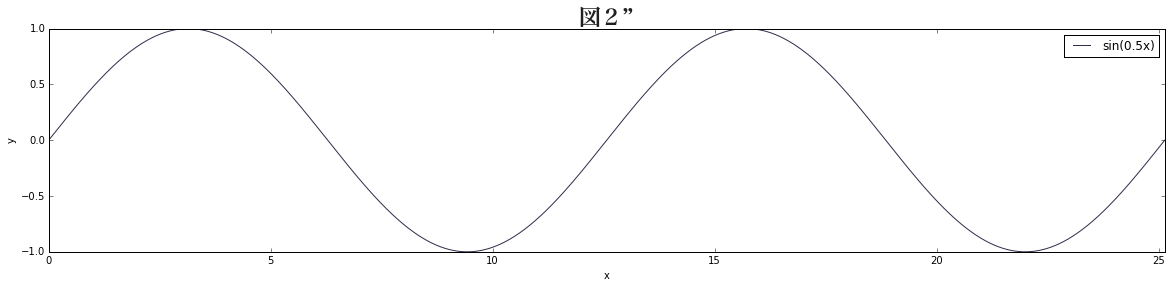

In [96]:
pylab.figure(figsize=(20,4))

x = np.linspace(0, 4*2*np.pi, 10000) # 比例の式
y = np.sin(x) + np.sin(0.5*x) #  y = sin(x) + sin(0.5x)
pylab.title('図２', fontproperties=fp, color="#202020") # タイトルをつけて
pylab.xlabel('x') # ラベリング
pylab.ylabel('y') # ラベリング
pylab.xlim([0,4*2*np.pi]) # 範囲を指定
pylab.plot(x, y, label="sin(x) + sin(0.5x)", color="#30304c") # 描画
pylab.legend()

pylab.show() # 描画


#========================================================================================================
#========================================================================================================
#========================================================================================================


pylab.figure(figsize=(20,4))

x = np.linspace(0, 4*2*np.pi, 10000) # 比例の式
y = np.sin(x) #  y = sin(x)
pylab.title('図２’', fontproperties=fp, color="#202020") # タイトルをつけて
pylab.xlabel('x') # ラベリング
pylab.ylabel('y') # ラベリング
pylab.xlim([0,4*2*np.pi]) # 範囲を指定
pylab.plot(x, y, label="sin(x)", color="#30304c") # 描画
pylab.legend() # 描画




pylab.figure(figsize=(20,4))

x = np.linspace(0, 4*2*np.pi, 10000) # 比例の式
y = np.sin(0.5*x) #  y = sin(0.5x)
pylab.title('図２”', fontproperties=fp, color="#202020") # タイトルをつけて
pylab.xlabel('x') # ラベリング
pylab.ylabel('y') # ラベリング
pylab.xlim([0,4*2*np.pi]) # 範囲を指定
pylab.plot(x, y, label="sin(0.5x)", color="#30304c") # 描画
pylab.legend() # 描画

pylab.show() # 描画

ここで、図２を見てください。  
図１とは色々と違いますね。これは、周波数($b$の値)が$1$であるsinの波と、周波数($b$の値)が$0.5$である$sin$の波を足し合わせたものになります。 
足し合わせた、というのは文字通り、単純な足し算です。  
このグラフは、 $y = sin(x) + sin(0.5x)$ のグラフです。$sin(x)$ と $sin(0.5x)$ では、$sin(0.5x)$ の方がゆるやかに動きます。  
$y = x$ という比例の式と、 $y = 2x$ という式だったら、 $y = 0.5x$ の方が傾きがゆるやかですよね。  
その法則は$sin$にも適用されて、$sin(0.5x)$ の方が山と谷がゆるやかになるのです。  

その下に、図２’と、図２”がありますね。  
真ん中にある図２’は $sin(x)$ のグラフで、その下にある図２”は $sin(0.5x)$ のグラフです。  
実際に、 $sin(0.5x)$ のグラフはゆるやかで、  
$sin(2x)$ のグラフは急なグラフになっています。  

この角度の違いが、「周波数」を生むのです！！！  
そして、異なる周波数を組み合わせると、図２のように「複雑な」曲線が生まれるのですっ！！！
さらに、さらにさらに・・・

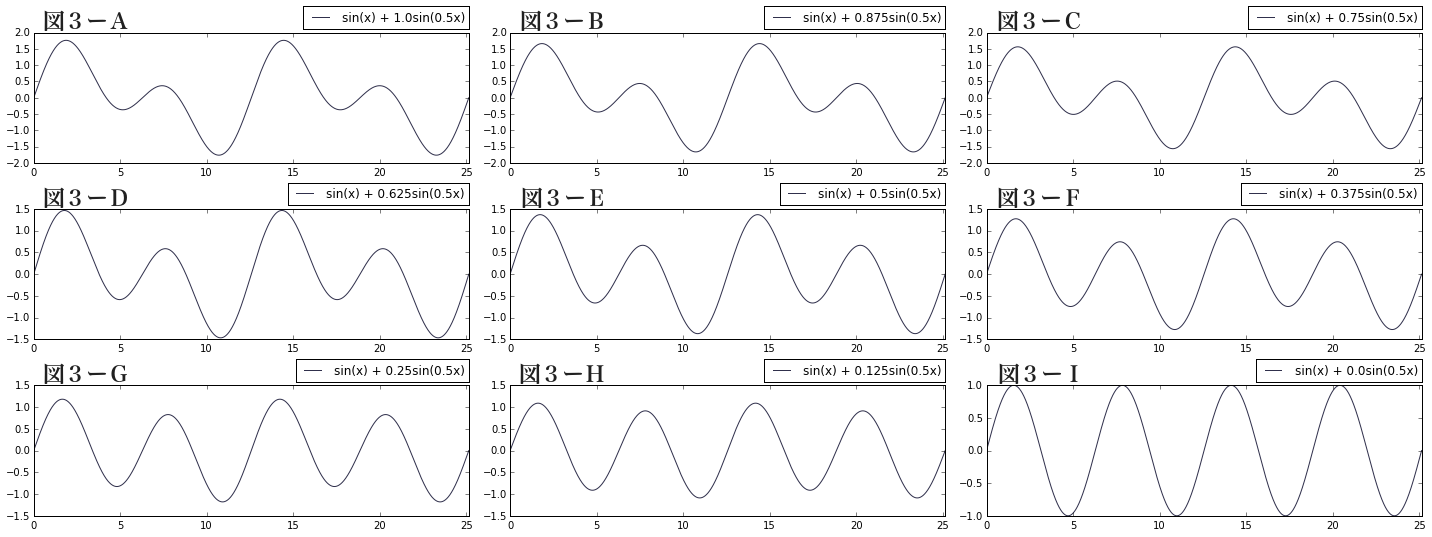

In [115]:
pylab.figure(figsize=(20, 7.5)) # 20 x 7.5nch の空間に描く

i = 0
for a in np.linspace(1, 0, 9): # それぞれy = sin(x) + a*sin(0.5x)のaの値が違う、9個のグラフを描く。
  x = np.linspace(0, 4*2*np.pi, 10000) # 比例の式
  y = np.sin(x) + a*np.sin(0.5*x) #  y = sin(x) + a*sin(0.5x)。
  pylab.subplot(3,3,i + 1) # 3マス x ３マス に描く
  pylab.title('図３ー'+chr(ord('Ａ') + i), fontproperties=fp, color="#202020", x=0.12) # タイトルつける
  pylab.xlim([0, 4*2*np.pi]) # 範囲を指定
  pylab.plot(x, y, label="sin(x) + " + str(a) + "sin(0.5x)", color="#30304c") # 描画
  pylab.legend(bbox_to_anchor=(0, 1.2, 1, 0), borderaxespad=0) # 描画
  i += 1

pylab.tight_layout() # tightなlayoutにする
pylab.show() # 描画

図３のＡ〜Ｉまでを見てください！！！  

こちらは、さっきの$y = sin(x) + sin(0.5x)$というグラフを改造して、  
図$A$は$y = sin(x) + 1 \times sin(0.5x)$、  
図$B$は$y = sin(x) + 0.875 \times sin(0.5x)$、  
図$C$は$y = sin(x) + 0.75 \times sin(0.5x)$、  
図$D$は$y = sin(x) + 0.625 \times sin(0.5x)$、というふうに、  
$sin(0.5x)$ を小数で掛けて、$sin(0.5x)$ を消していった感じのものになります。


さっき、というか随分前にですが、フーリエ変換の凄いところは、音の影響力というのを、$a$という値にして、数学的に表せるところだ、と言いました。  
ここではその$a$の話をします。  

図$A$→図$B$→図$C$→図$D$→図$E$→図$F$→図$G$→図$H$→図$I$、と行くにつれて、だんだん波が小刻みになっているように思えませんか？  
そして、だんだんと図２’のように、規則的になっていませんか？  

これは紙に描いているので、分かりづらいと思いますが・・・
これは、先ほど言った通り、$y = sin(x) + sin(0.5x)$、というグラフを作り、$sin(0.5x)$ を小数で掛けることで、
$sin(0.5x)$の影響力をだんだんと小さくしていった、というグラフです。  



## What is "Fourier Transform" used for?

では、ここですこし寄り道して、フーリエ変換が何に使われているのか、というのを話したいと思います。

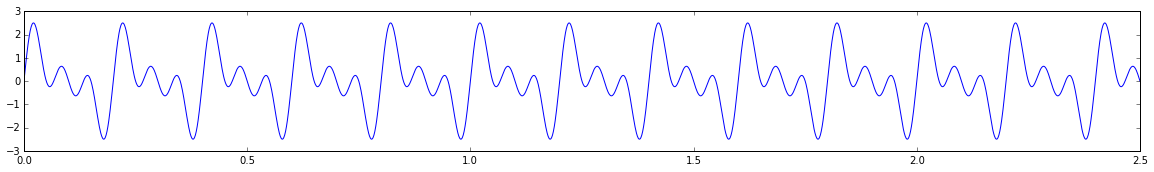

AttributeError: 'module' object has no attribute 'fftpack'

In [212]:
signal = lambda x: np.sin(x*5*2*np.pi) + np.sin(x*10*2*np.pi) + np.sin(x*15*2*np.pi)

x = np.linspace(0, 120, 120000)

y = signal(x)

pylab.figure(figsize=[20, 2.5])
pylab.xlim(0, 2.5)
pylab.plot(x, y)
pylab.show()

fftdata = abs(scipy.fft(y))
freqs = scipy.fftpack.fftfreq(signaldata.size, x[1]-x[0])

pylab.clf()
pylab.plot(freqs, fftdata)
pylab.show()

# 出典・参考文献

この本の知識を全体で100%にすると、

* 僕のきっと間違っていないであろう裏付けをしていない知識 ・・・ 30%
* きっと100%確証性のあるであろう裏付けをしている知識
  * インターネットの優しい人々・・・20%
    * http://keisan.casio.jp/exec/system/1260261251 高精度計算サイト - 三角関数（度）
    * http://iphone.moo.jp/app/?p=374 MetaArt メタアートをコンセプトに送るiPhoneアプリ開発の日々 - フーリエ変換の本質
    * http://www.geocities.co.jp/AnimalPark-Shiro/1620/ft_index.html フーリエ変換基礎講座
  * 絶対に間違ったことを言わないWikipedia教授・・・50%
    * https://ja.wikipedia.org/wiki/ジョゼフ・フーリエ
    * https://ja.wikipedia.org/wiki/フーリエ変換
    * https://ja.wikipedia.org/wiki/フーリエ級数
    * https://ja.wikipedia.org/wiki/正弦波
 
の提供〈出典〉でお送り致しました。wikipedia便利。 